# QuarentenaDados - Alura

### Aula 1 - Analisando dados de filmes. Dataset obtido em: https://grouplens.org/datasets/movielens/

Vamos importar a biblioteca pandas, um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando pd.read_csv().

Estamos lendo um arquivo CSV (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o pd.read_excel() que lê arquivos xlsx entre diversos outros formatos, você pode encontrar mais informações na seção de input/output da documentação.

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método filmes.head() para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método filmes.sample(), se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (filmes.sample(5)).

In [1]:
import pandas as pd

In [2]:
#Lendo csv de filmes
filmes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\movies.csv")

In [3]:
#Renomeando colunas
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [100]:
filmes.shape

(9742, 3)

Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples?
Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um ? na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos:

In [99]:
# lendo a documentação de um método/atributo

?filmes.head

In [5]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
filmeId    9742 non-null int64
titulo     9742 non-null object
generos    9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [77]:
#Lendo csv de avaliações
avaliacoes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações.

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [78]:
avaliacoes.shape

(100836, 4)

In [79]:
#Alterando o nome das colunas
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "dataregistro"]
avaliacoes.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do filmeId 1 é chamando o método avaliacaoes.query("filmeId==1"), esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do filmeId 1 podemos chamar o avaliacoes_do_filme_1.describe(), para analisar as estatítiscas gerais dos dados.

In [9]:
#Analisando o filme 1
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [10]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,dataregistro
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do filmeId 1:

In [101]:
avaliacoes_do_filme_1.mean()

usuarioId       3.065302e+02
filmeId         1.000000e+00
nota            3.920930e+00
dataregistro    1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o filmeId 1, mas também podemos chamar o método .describe() para a base completa (avaliacões).

In [11]:
avaliacoes.describe()

,usuarioId,filmeId,nota,dataregistro
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
avaliacoes["nota"].mean()

3.501556983616962

In [13]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [14]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [15]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [16]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


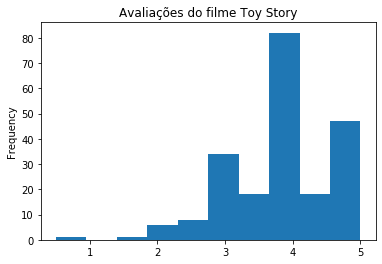

In [19]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

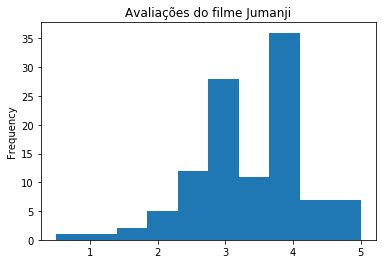

In [18]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Jumanji")

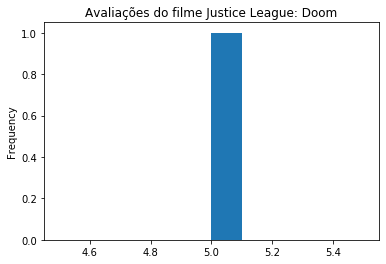

In [20]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

### Desafio 1 - Determine quantos filmes não tem avaliações e quais são esses filmes.

In [21]:
#Verificando quais colunas possuem valores nulos/brancos
filmes_com_media.isna().sum()

filmeId     0
titulo      0
generos     0
nota       18
dtype: int64

In [22]:
#Localizando as 18 notas com NaN e quais são os filmes
filmes_com_media.query("nota != nota")

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [23]:
filmes_com_media.rename(columns={"nota": "nota_média"},inplace = True)

In [24]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [25]:
filmes_com_media["generos"].isnull().value_counts()

False    9742
Name: generos, dtype: int64

### Desafio 3 - Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [26]:
#Criando a coluna count com as avaliações por filme
count = avaliacoes.groupby(["filmeId"])["filmeId"].count().reset_index(name="total_votos")
count.head()

,filmeId,total_votos
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [27]:
#Dando um merge nos dfs
filmes_final = filmes_com_media.merge(count, on="filmeId")

In [28]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.

In [29]:
filmes_final = filmes_final.round({'nota_média': 2})

In [30]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio 5 - Descobrir os generos dos filmes (quais são eles, únicos).

In [31]:
#Como temos mais de um genero por filme em alguns casos, precisamos quebrar essa coluna. 
#Primeiro um split na coluna para criar uma lista de generos
generos = filmes_final['generos'].str.split("|").tolist()

In [32]:
#O resultado é uma lista de listas, então precisamos retirar todos os itens de todas as listas.
lista_generos = []
for i in generos:
    lista_generos.extend(i)

In [33]:
#E set para retirar valores duplicados.
set(lista_generos)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Desafio 6 - Contar o número de aparições de cada gênero.

In [34]:
#Importando collections, que possui uma função que resolve esse desafio
from collections import Counter

In [35]:
dict_generos = Counter(lista_generos)

In [36]:
dict_generos

Counter({'Adventure': 1262,
         'Animation': 610,
         'Children': 664,
         'Comedy': 3753,
         'Fantasy': 778,
         'Romance': 1591,
         'Drama': 4349,
         'Action': 1828,
         'Crime': 1196,
         'Thriller': 1889,
         'Horror': 977,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 381,
         'Musical': 333,
         'Documentary': 438,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 85,
         '(no genres listed)': 34})

### Desafio 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [37]:
#Passar o resultado do Counter para um formato que podemos usar no plot (dataframe)
df_generos = pd.DataFrame.from_dict(dict_generos, orient='index').reset_index()
df_generos.columns = ["genero", "quantidade"]

In [38]:
df_generos = df_generos.sort_values(by=['quantidade'],ascending=False).reset_index(drop=True)

In [39]:
df_generos

,genero,quantidade
0,Drama,4349
1,Comedy,3753
2,Thriller,1889
3,Action,1828
4,Romance,1591
5,Adventure,1262
6,Crime,1196
7,Sci-Fi,980
8,Horror,977
9,Fantasy,778


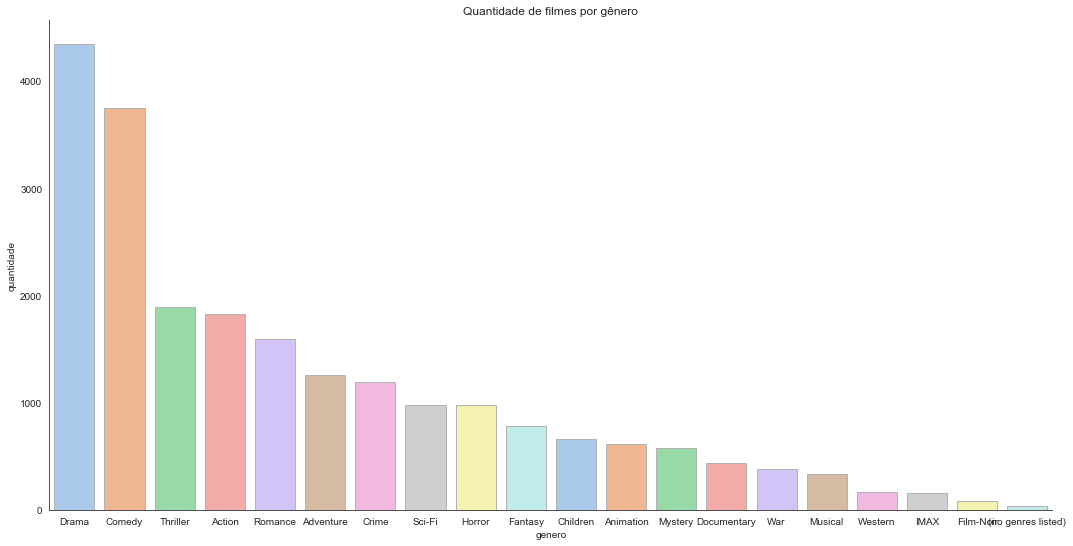

In [40]:
#Plot 
import seaborn as sns
sns.set_style("white")

sns.catplot(x="genero", y="quantidade", kind = "bar", data=df_generos,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
plt.title('Quantidade de filmes por gênero')
plt.show()

### Aula 2 - Analisando dados de filmes com mais profundidade

In [41]:
#Analisando filmes com médias aproximadas, olhar apenas as médias pode ser um problema
filmes_final.sort_values("nota_média", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_média,total_votos
8747,128620,Victoria (2015),Crime|Drama|Romance,3.90,5
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90,48
5467,26258,"Topo, El (1970)",Fantasy|Western,3.90,5
4786,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90,62
5439,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90,5
3012,4034,Traffic (2000),Crime|Drama|Thriller,3.90,70
4094,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90,5
2890,3871,Shane (1953),Drama|Western,3.90,5
6563,55247,Into the Wild (2007),Action|Adventure|Drama,3.90,41
2155,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90,30


In [42]:
#Função para trazer plot do filme
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
    notas_do_filme.plot(kind='hist')
    return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

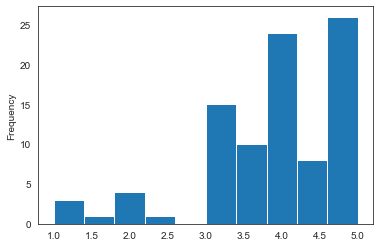

In [43]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

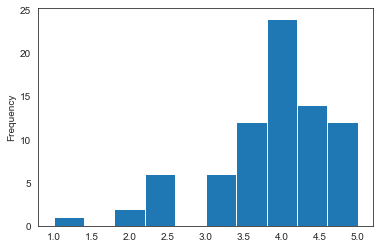

In [44]:
plot_filme(46578)

In [45]:
#Otimizando a função de plot, para trazer também um boxplot e termos mais informações estatísticas

def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
    notas_do_filme.plot(kind='hist')
    plt.show()
    print('\n')
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()

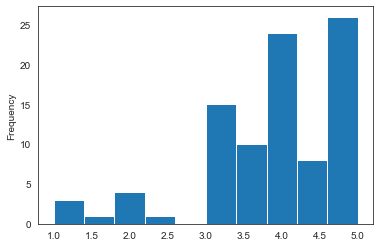

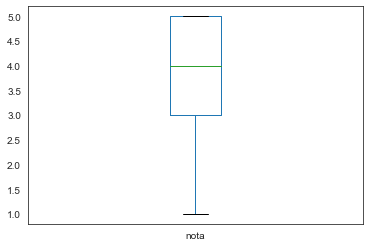

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [46]:
plot_filme(919)

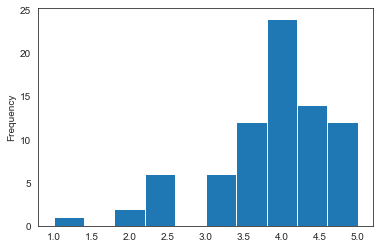

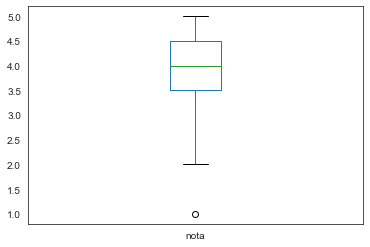

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [47]:
plot_filme(46578)

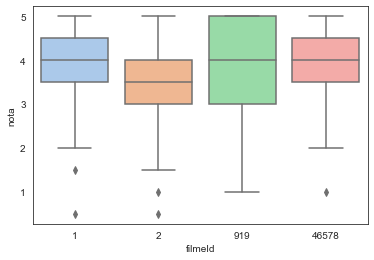

In [48]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota",palette='pastel')

### Desafio 1 - Rotacionar os thicks (os nomes dos generos) do gráfico de barras  (o último), de forma a deixar as legendas mais legíveis.

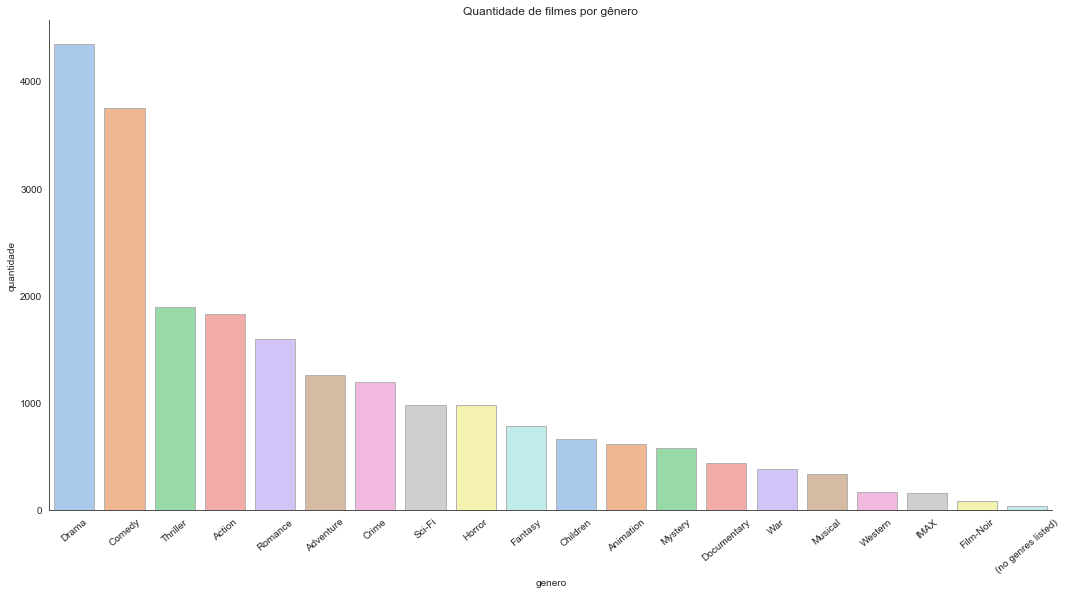

In [49]:
chart = sns.catplot(x="genero", y="quantidade", kind = "bar", data=df_generos,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
chart.set_xticklabels(rotation=40)
plt.title('Quantidade de filmes por gênero')
plt.show()

### Desafio 2 - Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [50]:
filmes_final.sort_values("nota_média", ascending=False)[2401:2408]

,filmeId,titulo,generos,nota_média,total_votos
4755,7090,Hero (Ying xiong) (2002),Action|Adventure|Drama,3.92,38
6534,54881,"King of Kong, The (2007)",Documentary,3.92,12
8081,100383,Side Effects (2013),Crime|Drama|Mystery|Thriller,3.92,6
7966,96728,"Master, The (2012)",Drama,3.92,6
4153,5989,Catch Me If You Can (2002),Crime|Drama,3.92,115
3123,4210,Manhunter (1986),Action|Crime|Drama|Horror|Thriller,3.92,6
2941,3949,Requiem for a Dream (2000),Drama,3.92,96


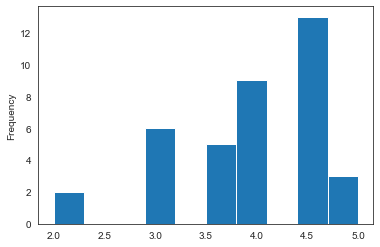

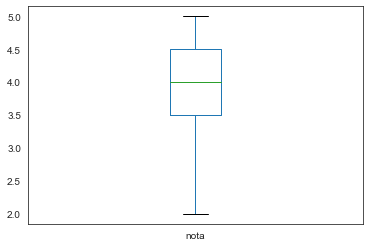

count    38.000000
mean      3.921053
std       0.758076
min       2.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [51]:
plot_filme(7090)

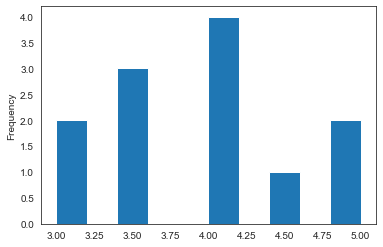

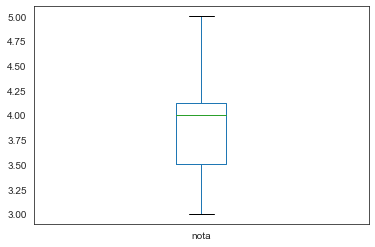

count    12.000000
mean      3.916667
std       0.668558
min       3.000000
25%       3.500000
50%       4.000000
75%       4.125000
max       5.000000
Name: nota, dtype: float64

In [52]:
plot_filme(54881)

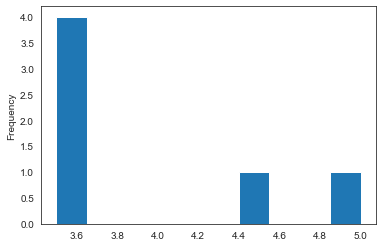

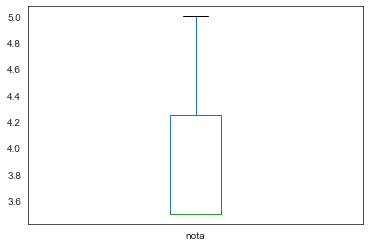

count    6.000000
mean     3.916667
std      0.664580
min      3.500000
25%      3.500000
50%      3.500000
75%      4.250000
max      5.000000
Name: nota, dtype: float64

In [53]:
plot_filme(100383)

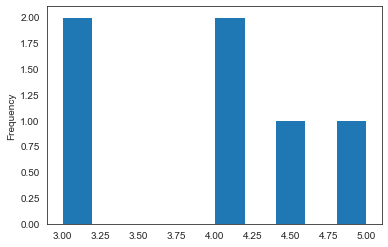

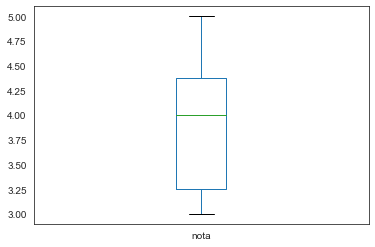

count    6.000000
mean     3.916667
std      0.801041
min      3.000000
25%      3.250000
50%      4.000000
75%      4.375000
max      5.000000
Name: nota, dtype: float64

In [54]:
plot_filme(96728)

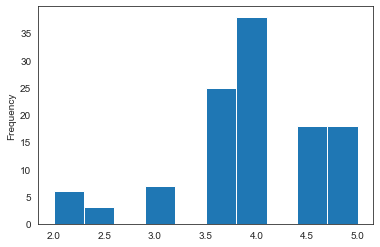

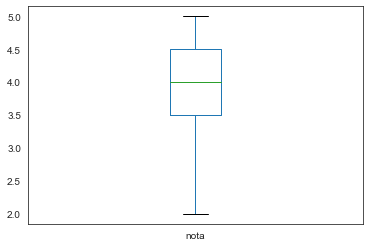

count    115.000000
mean       3.921739
std        0.759707
min        2.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [55]:
plot_filme(5989)

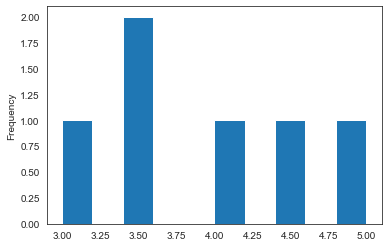

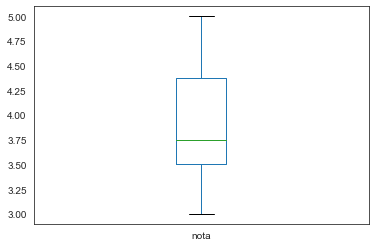

count    6.000000
mean     3.916667
std      0.735980
min      3.000000
25%      3.500000
50%      3.750000
75%      4.375000
max      5.000000
Name: nota, dtype: float64

In [56]:
plot_filme(4210)

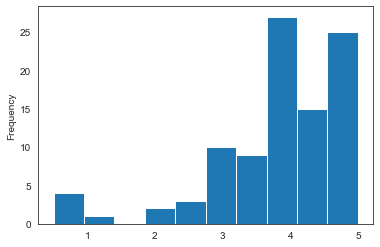

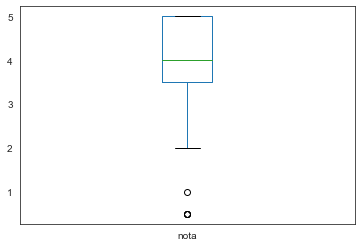

count    96.000000
mean      3.921875
std       1.091421
min       0.500000
25%       3.500000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [57]:
plot_filme(3949)

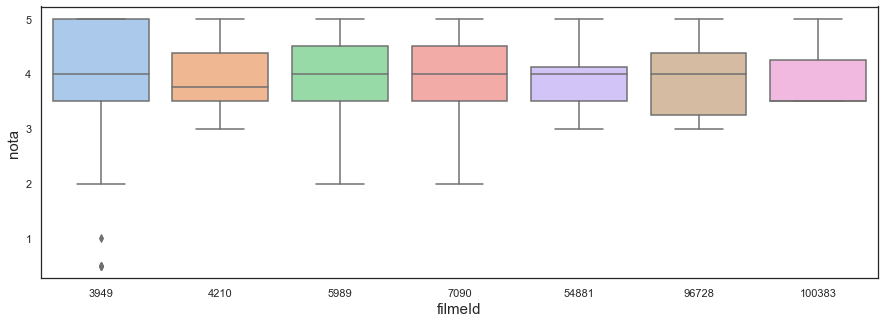

In [85]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = avaliacoes.query("filmeId in [7090,54881,100383,96728,5989,4210,3949]"), x ="filmeId", y="nota",palette='pastel')

### Desafio 3 - Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!)

In [59]:
top10_votos = filmes_final.sort_values("total_votos", ascending=False).head(10).reset_index(drop=True)

In [60]:
top10_votos

,filmeId,titulo,generos,nota_média,total_votos
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238
7,110,Braveheart (1995),Action|Drama|War,4.03,237
8,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224
9,527,Schindler's List (1993),Drama|War,4.22,220


<Figure size 1080x360 with 0 Axes>

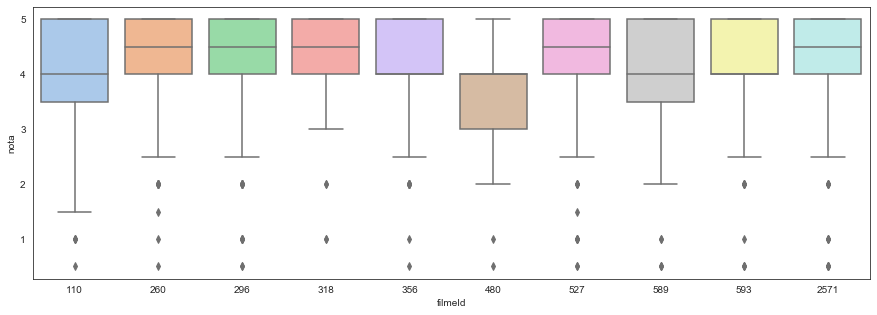

In [61]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = avaliacoes.query("filmeId in [356,318,296,593,2571,260,480,110,589,527]"), x ="filmeId", y="nota",palette='pastel')

 - Apenas um dos filmes não é da década de 90 (Star Wars: Episode IV - A New Hope (1977))

### Desafio 4 - Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [62]:
data = avaliacoes.query("filmeId in [1,2,919,46578]")

In [63]:
data = data.merge(filmes, on="filmeId",how='left')

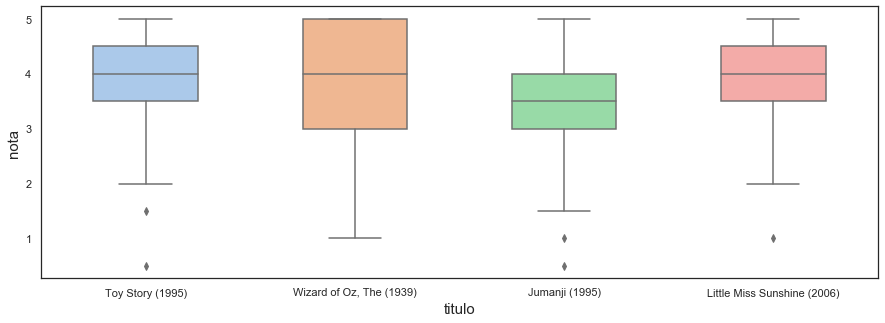

In [98]:
plt.figure(figsize=(15, 5))
sns.set_style("white")
sns.boxplot(data = data, x ="titulo", y="nota",palette='pastel',width=0.5)
plt.show()

### Desafio 5 - Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [65]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


In [66]:
notas_medianas_por_filme = avaliacoes.groupby("filmeId")["nota"].median()
filmes_final = filmes_final.join(notas_medianas_por_filme, on="filmeId")
filmes_final.rename(columns={"nota": "nota_mediana"},inplace = True)
filmes_final = filmes_final.round({'nota_mediana': 2})
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos,nota_mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49,3.0


In [67]:
notas_moda_por_filme = avaliacoes.groupby("filmeId")["nota"].agg(lambda x: x.mode()[0])
filmes_final = filmes_final.join(notas_moda_por_filme, on="filmeId")
filmes_final.rename(columns={"nota": "nota_moda"},inplace = True)
filmes_final = filmes_final.round({'nota_moda': 2})
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos,nota_mediana,nota_moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,4.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,3.5,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,3.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7,3.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49,3.0,3.0


### Desafio 7 - Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [80]:
#Primeiramente, ajustar o formato da coluna de data no df de avaliações
type(avaliacoes['dataregistro'][0])

numpy.int64

In [81]:
avaliacoes['dataregistro'] = pd.to_datetime(avaliacoes['dataregistro'], unit='s')

In [82]:
avaliacoes.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [83]:
#Criar df trazendo a média das notas por ano
media_anual = avaliacoes.groupby(avaliacoes['dataregistro'].dt.year)['nota'].agg(['mean']).reset_index()
media_anual = media_anual.round({'mean': 2})
media_anual.head()

,dataregistro,mean
0,1996,3.54
1,1997,3.73
2,1998,3.44
3,1999,3.77
4,2000,3.39


<Figure size 1080x360 with 0 Axes>

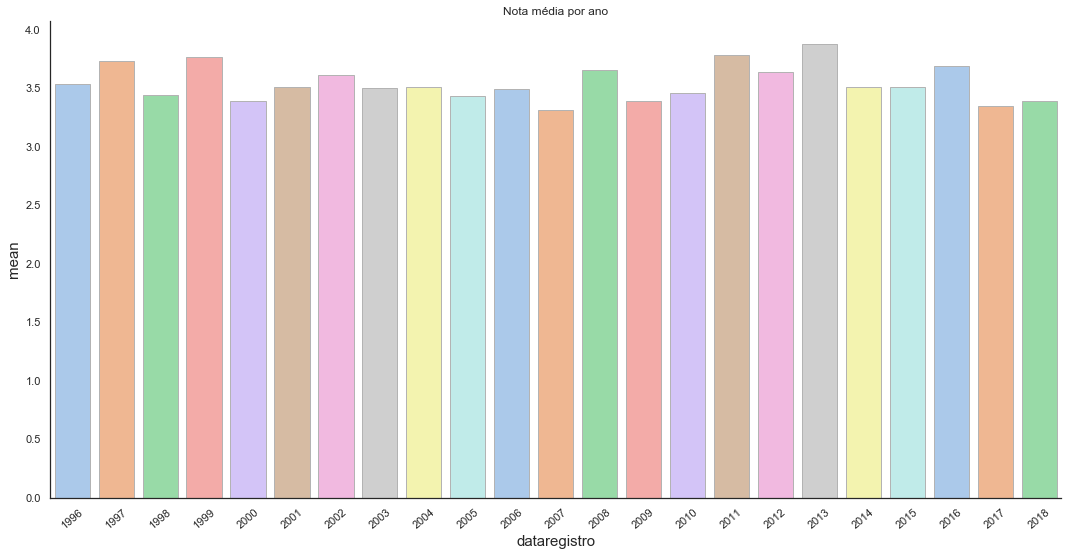

In [84]:
#Plotar a info
sns.set_style("white")
plt.figure(figsize=(15, 5))
chart = sns.catplot(x="dataregistro", y="mean", kind = "bar", data=media_anual,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
chart.set_xticklabels(rotation=40)
plt.title('Nota média por ano')
plt.show()